# 从文本到语音

在上一个单元中，您学习了如何使用 Transformer 将口语语音转换为文本。现在让我们翻转脚本，看看如何将给定的输入文本转换为听起来像人类语音的音频输出。

我们将在本单元中学习的任务称为“文本转语音”（TTS）。能够将文本转换为人类可听语音的模型具有广泛的潜在应用：

    辅助应用程序：考虑可以利用这些模型的工具，使视障人士能够通过声音媒介访问数字内容。
    有声读物旁白：将书面书籍转换为音频形式，使喜欢听或阅读有困难的人更容易理解文学作品。
    虚拟助理：TTS 模型是 Siri、Google Assistant 或 Amazon Alexa 等虚拟助理的基本组成部分。一旦他们使用分类模型捕获唤醒词，并使用 ASR 模型处理您的请求，他们就可以使用 TTS 模型来响应您的询问。
    娱乐、游戏和语言学习：为您的 NPC 角色配音、讲述游戏事件，或通过单词和短语的正确发音和语调示例来帮助语言学习者。

这些只是几个例子，我相信您可以想象更多！然而，权力越大，责任也随之而来，重要的是要强调 TTS 模型有可能被用于恶意目的。例如，如果有足够的语音样本，恶意行为者可能会创建令人信服的虚假录音，从而导致未经授权使用某人的语音进行欺诈或操纵。如果您计划收集数据来微调自己的系统，请仔细考虑隐私和知情同意。语音数据应在个人明确同意的情况下获取，确保他们了解 TTS 系统中使用其语音的目的、范围和潜在风险。请负责任地使用文本转语音。

## 文本转语音数据集

文本到语音任务（也称为语音合成）面临着一系列挑战。

首先，就像前面讨论的自动语音识别一样，文本和语音之间的对齐可能很棘手。
然而，与ASR不同的是，TTS是一个一对多的映射问题，即相同的文本可以通过多种不同的方式合成。想想你每天听到的演讲中声音和说话风格的多样性 - 每个人都有不同的方式说同一句话，但它们都是有效和正确的！即使不同的输出（频谱图或音频波形）也可以对应相同的基本事实。该模型必须学会为每个音素、单词或句子生成正确的持续时间和时间，这可能具有挑战性，尤其是对于长而复杂的句子。

接下来，还有长距离依赖问题：语言具有时间方面，理解句子的含义通常需要考虑周围单词的上下文。确保 TTS 模型捕获并保留长序列的上下文信息对于生成连贯且自然的语音至关重要。

最后，训练 TTS 模型通常需要成对的文本和相应的语音录音。最重要的是，为了确保模型能够生成对于不同说话者和说话风格来说听起来自然的语音，数据应该包含来自多个说话者的多样化且有代表性的语音样本。收集此类数据既昂贵又耗时，而且对于某些语言来说是不可行的。您可能会想，为什么不直接采用为 ASR（自动语音识别）设计的数据集并用它来训练 TTS 模型呢？不幸的是，自动语音识别（ASR）数据集并不是最佳选择。有利于 ASR 的功能（例如过多的背景噪音）在 TTS 中通常是不需要的。能够从嘈杂的街头录音中挑选出说话真是太好了，但如果你的语音助手在汽车鸣笛声和施工现场如火如荼的背景下回复你，情况就不那么严重了。尽管如此，某些 ASR 数据集有时可用于微调，因为寻找高质量、多语言和多说话者的 TTS 数据集可能相当具有挑战性。

让我们探索一些适合 TTS 的数据集，您可以在 🤗 Hub 上找到这些数据集。

### LJSpeech

LJSpeech是一个数据集，包含 13,100 个英语音频剪辑及其相应的转录。该数据集包含单个说话者阅读 7 本非小说类英语书籍中的句子的录音。LJSpeech因其高音频质量和多样化的语言内容而经常被用作评估TTS模型的基准。

### Multilingual LibriSpeech

多语言 LibriSpeech是 LibriSpeech 数据集的多语言扩展，该数据集是已阅读的英语有声读物的大规模集合。多语言 LibriSpeech 对此进行了扩展，包括其他语言，例如德语、荷兰语、西班牙语、法语、意大利语、葡萄牙语和波兰语。它提供录音以及每种语言的对齐转录。该数据集为开发多语言 TTS 系统和探索跨语言语音合成技术提供了宝贵的资源。

### VCTK (Voice Cloning Toolkit)

VCTK是专门为文本转语音研究和开发而设计的数据集。它包含 110 位不同口音的英语使用者的录音。每位演讲者读出约 400 个句子，这些句子选自报纸、彩虹段落和用于演讲口音档案的引出段落。VCTK 为训练具有不同声音和口音的 TTS 模型提供了宝贵的资源，从而实现更自然和多样化的语音合成。

### Libri-TTS/ LibriTTS-R

Libri-TTS/ LibriTTS-R是一个多说话者英语语料库，包含约 585 小时以 24kHz 采样率阅读的英语语音，由 Heiga Zen 在 Google Speech 和 Google Brain 团队成员的协助下准备。LibriTTS 语料库专为 TTS 研究而设计。它源自 LibriSpeech 语料库的原始材料（来自 LibriVox 的 mp3 音频文件和来自 Project Gutenberg 的文本文件）。与 LibriSpeech 语料库的主要区别如下：

音频文件的采样率为 24kHz。
演讲在断句处被分割。
包括原始文本和规范化文本。
可以提取上下文信息（例如，相邻句子）。
排除具有显着背景噪音的话语。
为 TTS 组装一个好的数据集并非易事，因为此类数据集必须具备几个关键特征：

高质量且多样化的录音，涵盖各种语音模式、口音、语言和情感。录音应清晰、无背景噪音，并表现出自然的语音特征。
转录：每个录音都应附有相应的文本转录。
各种语言内容：数据集应包含各种语言内容，包括不同类型的句子、短语和单词。它应该涵盖各种主题、流派和领域，以确保模型能够处理不同的语言环境。

好消息是，您不太可能需要从头开始训练 TTS 模型。在下一节中，我们将研究 🤗 Hub 上提供的预训练模型。

## 用于文本转语音的预训练模型

与 ASR（自动语音识别）和音频分类任务相比，可用的预训练模型检查点要少得多。在 🤗 Hub 上，您会找到近 300 个合适的检查点。在这些预训练模型中，我们将重点关注 🤗 Transformers 库中随时提供的两种架构 - SpeechT5 和大规模多语言语音 (MMS)。在本节中，我们将探讨如何使用 Transformers 库中的这些预训练模型进行 TTS。

### SpeechT5

peechT5是Junyi Ao等人发布的模型。来自 Microsoft 的能够处理一系列语音任务的软件。虽然在本单元中，我们重点关注文本到语音方面，但该模型可以针对语音到文本任务（自动语音识别或说话人识别）以及语音到语音（例如语音增强或不同声音之间的转换）。这是由于模型的设计和预训练方式所致。

SpeechT5 的核心是常规 Transformer 编码器-解码器模型。就像任何其他 Transformer 一样，编码器-解码器网络使用隐藏表示对序列到序列的转换进行建模。对于 SpeechT5 支持的所有任务，该 Transformer 主干都是相同的。

该 Transformer 还配有六个特定于模态（语音/文本）的前置网络和后置网络。输入的语音或文本（取决于任务）通过相应的预网络进行预处理，以获得 Transformer 可以使用的隐藏表示。然后，Transformer 的输出被传递到后网络，后网络将使用它来生成目标模态的输出。

这就是架构的样子（图片来自原始论文）：

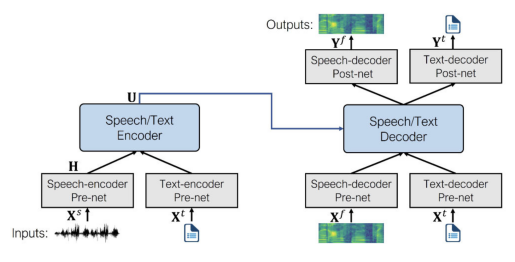

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic = mpimg.imread('images/6.1architecture.jpg')
pic.shape
plt.imshow(pic)
plt.axis('off') 
plt.show()

SpeechT5 首先使用大规模未标记语音和文本数据进行预训练，以获得不同模态的统一表示。在预训练阶段，所有前网和后网同时使用。

预训练后，整个编码器-解码器主干针对每个单独的任务进行微调。在此步骤中，仅采用与特定任务相关的前置网络和后置网络。例如，要使用 SpeechT5 进行文本转语音，您需要用于文本输入的文本编码器前置网络和用于语音输出的语音解码器前置网络和后置网络。

这种方法允许获得针对不同语音任务进行微调的多个模型，这些模型都受益于对未标记数据的初始预训练。

<font color="greenyellow">尽管微调模型一开始使用来自共享预训练模型的相同权重集，但最终版本最终却有很大不同。例如，您无法采用经过微调的 ASR 模型并交换前网络和后网络来获得有效的 TTS 模型。SpeechT5 很灵活，但没那么灵活；）</font>

让我们看看 SpeechT5 具体用于 TTS 任务的前置网络和后置网络是什么：

    文本编码器预网络：将文本标记映射到编码器期望的隐藏表示的文本嵌入层。这与 BERT 等 NLP 模型中发生的情况类似。
    语音解码器预网络：这采用对数梅尔频谱图作为输入，并使用一系列线性层将频谱图压缩为隐藏表示。
    语音解码器后网络：这会预测要添加到输出频谱图中的残差，并用于细化结果。

结合起来，文本转语音的 SpeechT5 架构如下所示：

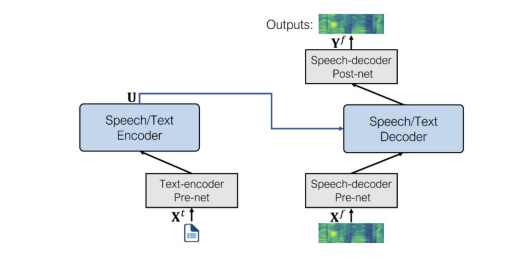

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic = mpimg.imread('images/6.2tts.jpg')
pic.shape
plt.imshow(pic)
plt.axis('off') 
plt.show()

如您所见，输出是对数梅尔频谱图，而不是最终波形。如果您还记得，我们在第 3 单元中简要讨论过这个主题。生成音频的模型通常会生成对数梅尔频谱图，需要使用称为声码器的附加神经网络将其转换为波形。

让我们看看你如何做到这一点。

首先，我们从 🤗 Hub 加载经过微调的 TTS SpeechT5 模型，以及用于标记化和特征提取的处理器对象：

In [1]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

接下来，对输入文本进行标记。

In [2]:
inputs = processor(text="Don't count the days, make the days count.", return_tensors="pt")

SpeechT5 TTS 模型不仅限于为单个说话者创建语音。相反，它使用所谓的说话者嵌入来捕获特定说话者的语音特征。

<font color="greenyellow">说话者嵌入是一种以紧凑的方式表示说话者身份的方法，作为固定大小的向量，无论话语的长度如何。这些嵌入捕获有关说话者的声音、口音、语调以及其他区分说话者和其他说话者的独特特征的基本信息。此类嵌入可用于说话人验证、说话人二值化、说话人识别等。生成说话人嵌入的最常见技术包括：

    I-Vector（恒等向量）：I-Vector 基于高斯混合模型 (GMM)。它们将说话人表示为从特定说话人的 GMM 统计数据中导出的低维固定长度向量，并且以无监督的方式获得。
    X 向量：X 向量是使用深度神经网络 (DNN) 导出的，并通过结合时间上下文来捕获帧级说话者信息。
X 向量是一种最先进的方法，与 I 向量相比，它在评估数据集上显示出卓越的性能。深度神经网络用于获取 X 向量：它训练以区分说话者，并将可变长度的话语映射到固定维度的嵌入。您还可以加载提前计算的 X-Vector 说话人嵌入，这将封装特定说话人的说话特征。</font>

让我们从 Hub 上的数据集加载这样一个嵌入的扬声器。嵌入是使用 此脚本从CMU ARCTIC 数据集获得的，但任何 X 向量嵌入都应该有效。

In [3]:
from datasets import load_dataset

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

import torch

speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

Generating validation split: 0 examples [00:00, ? examples/s]

说话者嵌入是形状为 (1, 512) 的张量。这个特定的扬声器嵌入描述了女性的声音。

此时，我们已经有足够的输入来生成对数梅尔频谱图作为输出，您可以这样做：

In [4]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

这会输出一个形状为 (140, 80) 的张量，其中包含对数梅尔频谱图。第一个维度是序列长度，并且它可能在运行之间有所不同，因为语音解码器预网络总是对输入序列应用 dropout。这为生成的语音添加了一些随机可变性。

但是，如果我们希望生成语音波形，则需要指定一个声码器用于声谱图到波形的转换。理论上，您可以使用任何适用于 80-bin 梅尔频谱图的声码器。方便的是，🤗 Transformers 提供了基于 HiFi-GAN 的声码器。其权重由 SpeechT5 的原作者慷慨提供。

<font color="greenyellow">HiFi-GAN是一种最先进的生成对抗网络 (GAN)，专为高保真语音合成而设计。它能够从频谱图输入生成高质量且逼真的音频波形。

从较高层面来看，HiFi-GAN 由一个生成器和两个鉴别器组成。该生成器是一个完全卷积神经网络，以梅尔频谱图作为输入并学习生成原始音频波形。鉴别器的作用是区分真实的音频和生成的音频。两个鉴别器侧重于音频的不同方面。

HiFi-GAN 在大量高质量录音数据集上进行训练。它使用所谓的对抗性训练，其中生成器和鉴别器网络相互竞争。最初，生成器产生低质量的音频，鉴别器可以轻松地将其与真实音频区分开来。随着训练的进行，生成器会提高其输出，旨在欺骗鉴别器。反过来，鉴别器在区分真实音频和生成音频方面变得更加准确。这种对抗性反馈循环有助于两个网络随着时间的推移而改进。最终，HiFi-GAN 学会生成与训练数据的特征非常相似的高保真音频。</font>

加载声码器与任何其他 🤗 Transformers 模型一样简单。

In [5]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

现在您需要做的就是在生成语音时将其作为参数传递，输出将自动转换为语音波形。

In [6]:
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

我们来听听结果。SpeechT5 使用的采样率始终为 16 kHz。

In [7]:
from IPython.display import Audio

Audio(speech, rate=16000)

请随意使用 SpeechT5 文本转语音演示、探索其他声音、尝试输入。请注意，此预训练检查点仅支持英语：

#### SpeechT5: Speech Synthesis


https://huggingface.co/spaces/Matthijs/speecht5-tts-demo

#### SpeechT5: Automatic Speech Recognition

https://huggingface.co/spaces/Matthijs/speecht5-asr-demo

#### SpeechT5: Voice Conversion

https://huggingface.co/spaces/Matthijs/speecht5-vc-demo

### Bark

Bark 是 Suno AI 在suno-ai/bark中提出的基于 Transformer 的文本转语音模型。

与 SpeechT5 不同，Bark 直接生成原始语音波形，无需在推理过程中使用单独的声码器 - 它已经集成。这种效率是通过使用Encodec既充当编解码器又充当压缩工具的 来实现的。

使用Encodec，您可以将音频压缩为轻量级格式以减少内存使用，然后将其解压缩以恢复原始音频。该压缩过程由 8 个码本促进，每个码本由整数向量组成。将这些码本视为整数形式的音频表示或嵌入。值得注意的是，每个连续的码本都提高了先前码本的音频重建质量。由于码本是整数向量，因此可以通过变压器模型来学习它们，这在这项任务中非常有效。这就是巴克经过专门训练的目的。

更具体地说，Bark 由 4 个主要模型组成：

    BarkSemanticModel（也称为“文本”模型）：一种因果自回归转换器模型，将标记化文本作为输入，并预测捕获文本含义的语义文本标记。
    BarkCoarseModel（也称为“粗略声学”模型）：因果自回归变压器，将模型结果作为输入BarkSemanticModel。它的目的是预测 EnCodec 所需的前两个音频码本。
    BarkFineModel（“精细声学”模型），这一次是一个非因果自动编码器变压器，它根据先前码本嵌入的总和迭代地预测最后一个码本。
    在预测了 的所有码本通道后EncodecModel，Bark 使用它来解码输出音频数组。

应该注意的是，前三个模块中的每一个都可以支持条件扬声器嵌入，以根据特定的预定义语音调节输出声音。

Bark 是一种高度可控的文本转语音模型，这意味着您可以使用各种设置，正如我们将要看到的。

在一切之前，加载模型及其处理器。

这里的处理器角色有两个方面：

    1. 它用于对输入文本进行标记，即将其切成模型可以理解的小块。
    2. 它存储扬声器嵌入，即可以调节生成的语音预设。

In [8]:
from transformers import BarkModel, BarkProcessor

model = BarkModel.from_pretrained("suno/bark-small")
processor = BarkProcessor.from_pretrained("suno/bark-small")

Bark 用途广泛，可以生成由扬声器嵌入库调节的音频，该库可以通过处理器加载。

In [9]:
# add a speaker embedding
inputs = processor("This is a test!", voice_preset="v2/en_speaker_3")

speech_output = model.generate(**inputs).cpu().numpy()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


它还可以生成随时可用的多语言语音，例如法语和中文。您可以在此处找到支持的语言列表。与下面讨论的 MMS 不同，不需要指定所使用的语言，而只需将输入文本调整为相应的语言即可。

In [10]:
# try it in French, let's also add a French speaker embedding
inputs = processor("C'est un test!", voice_preset="v2/fr_speaker_1")

speech_output = model.generate(**inputs).cpu().numpy()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


该模型还可以生成非语言交流，例如笑、叹息和哭泣。您只需使用相应的提示（例如 、 或 ）修改输入[clears throat]文本[laughter]即可...。

In [11]:
inputs = processor(
    "[clears throat] This is a test ... and I just took a long pause.",
    voice_preset="v2/fr_speaker_1",
)

speech_output = model.generate(**inputs).cpu().numpy()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


Bark甚至可以产生音乐。您可以通过在单词周围添加 ♪ 音符 ♪ 来提供帮助。

In [12]:
inputs = processor(
    "♪ In the mighty jungle, I'm trying to generate barks.",
)

speech_output = model.generate(**inputs).cpu().numpy()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


除了所有这些功能之外，Bark 还支持批处理，这意味着您可以同时处理多个文本条目，但代价是更密集的计算。在某些硬件（例如 GPU）上，批处理可以加快整体生成速度，这意味着一次生成所有样本比逐个生成样本更快。

让我们尝试生成一些示例：

In [13]:
input_list = [
    "[clears throat] Hello uh ..., my dog is cute [laughter]",
    "Let's try generating speech, with Bark, a text-to-speech model",
    "♪ In the jungle, the mighty jungle, the lion barks tonight ♪",
]

# also add a speaker embedding
inputs = processor(input_list, voice_preset="v2/en_speaker_3")

speech_output = model.generate(**inputs).cpu().numpy()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


让我们一一聆听输出。

第一：

In [14]:
from IPython.display import Audio

sampling_rate = model.generation_config.sample_rate
Audio(speech_output[0], rate=sampling_rate)

第二个：

In [15]:
Audio(speech_output[1], rate=sampling_rate)

第三个：

In [16]:
Audio(speech_output[2], rate=sampling_rate)

<font color="greenyellow">Bark 与其他🤗 Transformers 模型一样，只需几行代码即可针对速度和内存影响进行优化。要了解具体操作方法，请单击此 colab 演示笔记本。</font>

### Massive Multilingual Speech (MMS)

如果您正在寻找英语以外的语言的预训练模型怎么办？大规模多语言语音（MMS）是另一种涵盖一系列语音任务的模型，但它支持大量语言。例如，它可以合成 1,100 多种语言的语音。

用于文本转语音的 MMS 基于VITS Kim 等人，2021，这是最先进的 TTS 方法之一。

VITS 是一个语音生成网络，可将文本转换为原始语音波形。它的工作原理类似于条件变分自动编码器，根据输入文本估计音频特征。首先，生成表示为频谱图的声学特征。然后使用改编自 HiFi-GAN 的转置卷积层对波形进行解码。在推理过程中，使用流模块和 HiFi-GAN 解码器对文本编码进行上采样并转换为波形。与 Bark 一样，不需要声码器，因为波形是直接生成的。

MMS 模型最近已添加到🤗 Transformers，因此您必须从源代码安装该库：


pip install git+https://github.com/huggingface/transformers.git

让我们尝试一下 MMS，看看如何合成英语以外的语言（例如德语）的语音。首先，我们将加载模型检查点和正确语言的分词器：

In [17]:
from transformers import VitsModel, VitsTokenizer

model = VitsModel.from_pretrained("Matthijs/mms-tts-deu")
tokenizer = VitsTokenizer.from_pretrained("Matthijs/mms-tts-deu")

您可能会注意到，要加载 MMS 模型，您需要使用VitsModel和VitsTokenizer。这是因为文本转语音的MMS基于前面提到的 VITS 模型。

让我们选择一个德语示例文本，就像一首儿歌中的前两行：

text_example = (
    "Ich bin Schnappi das kleine Krokodil, komm aus Ägypten das liegt direkt am Nil."
)

要生成波形输出，请使用分词器预处理文本，并将其传递给模型：

In [19]:
import torch

inputs = tokenizer(text_example, return_tensors="pt")
input_ids = inputs["input_ids"]


with torch.no_grad():
    outputs = model(input_ids)

speech = outputs["waveform"]

我们来听一下：

In [20]:
from IPython.display import Audio

Audio(speech, rate=16000)

棒极了！如果您想尝试使用其他语言的彩信，请在 🤗 Hub 上vits查找其他合适的检查点。

现在让我们看看如何自己微调 TTS 模型！

## Fine-tuning SpeechT5

现在您已经熟悉了文本转语音任务以及基于英语语言数据预训练的 SpeechT5 模型的内部工作原理，让我们看看如何将其微调为另一种语言。

### House-keeping

如果您想重现此示例，请确保您有 GPU。在笔记本中，您可以使用以下命令进行检查：nvidia-smi

<font color="red">在我们的示例中，我们将使用大约 40 小时的训练数据。如果您想继续使用 Google Colab 免费套餐 GPU，则需要将训练数据量减少到大约 10-15 小时，并减少训练步骤数。</font>

您还需要一些额外的依赖项：pip install transformers datasets soundfile speechbrain accelerate

最后，不要忘记登录您的 Hugging Face 帐户，以便您可以上传模型并与社区分享：

In [1]:
from huggingface_hub import notebook_login

notebook_login()

### 数据集

在本示例中，我们将采用VoxPopuli数据集的荷兰语 ( nl) 语言子集。 VoxPopuli是一个大型多语言语音语料库，由来自 2009-2020 年欧洲议会活动录音的数据组成。它包含 15 种欧洲语言的带标签音频转录数据。虽然我们将使用荷兰语子集，但请随意选择另一个子集。

这是一个自动语音识别 (ASR) 数据集，因此，如前所述，它不是训练 TTS 模型的最合适选择。不过，对于本次练习来说，这已经足够了。

让我们加载数据：

In [2]:
from datasets import load_dataset, Audio

dataset = load_dataset("facebook/voxpopuli", "nl", split="train")
len(dataset)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

20968

20968 个示例应该足以进行微调。SpeechT5 期望音频数据的采样率为 16 kHz，因此请确保数据集中的示例满足此要求：

In [3]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

### 预处理数据

让我们首先定义要使用的模型检查点，并加载包含标记生成器和特征提取器的适当处理器，我们将需要它们来准备训练数据：

In [4]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

#### SpeechT5 标记化的文本清理

首先，为了准备文本，我们需要处理器的分词器部分，所以让我们得到它：

In [5]:
tokenizer = processor.tokenizer

让我们看一个例子：

In [6]:
dataset[0]

{'audio_id': '20100210-0900-PLENARY-3-nl_20100210-09:06:43_4',
 'language': 9,
 'audio': {'path': '/home/danfouer/.cache/huggingface/datasets/downloads/extracted/4b15526727ceafe8fce526aaad2660512269d72ecd096e3dd6afbfc0c6b48493/train_part_0/20100210-0900-PLENARY-3-nl_20100210-09:06:43_4.wav',
  'array': array([ 4.27246094e-04,  1.31225586e-03,  1.03759766e-03, ...,
         -9.15527344e-05,  7.62939453e-04, -2.44140625e-04]),
  'sampling_rate': 16000},
 'raw_text': 'Dat kan naar mijn gevoel alleen met een brede meerderheid die wij samen zoeken.',
 'normalized_text': 'dat kan naar mijn gevoel alleen met een brede meerderheid die wij samen zoeken.',
 'gender': 'female',
 'speaker_id': '1122',
 'is_gold_transcript': True,
 'accent': 'None'}

您可能会注意到数据集示例包含raw_text和normalized_text功能。在决定使用哪个功能作为文本输入时，重要的是要知道 SpeechT5 标记器没有任何数字标记。数字normalized_text被写为文本。因此，它更适合，我们应该将其用作normalized_text 输入文本。

由于 SpeechT5 是使用英语进行训练的，因此它可能无法识别荷兰语数据集中的某些字符。如果保持原样，这些字符将转换为<unk>标记。然而，在荷兰语中，某些字符（如）à用于重读音节。为了保留文本的含义，我们可以将此字符替换为常规字符a。

SpeechT5Tokenizer要识别不受支持的标记，请使用将字符用作标记的方法提取数据集中的所有唯一字符。为此，我们将编写extract_all_chars映射函数，将所有示例的转录连接到一个字符串中，并将其转换为一组字符。确保设置batched=True和batch_size=-1in dataset.map()，以便所有转录均可立即用于映射功能。

In [7]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/20968 [00:00<?, ? examples/s]

现在您有两组字符：一组使用数据集中的词汇，一组使用分词器中的词汇。要识别数据集中任何不受支持的字符，您可以计算这两组之间的差异。结果集将包含数据集中但不在标记生成器中的字符。

In [8]:
dataset_vocab - tokenizer_vocab

{' ', 'à', 'ç', 'è', 'ë', 'í', 'ï', 'ö', 'ü'}

为了处理上一步中识别的不支持的字符，我们可以定义一个函数将这些字符映射到有效的标记。请注意，空格已▁在分词器中被替换，不需要单独处理。

In [9]:
replacements = [
    ("à", "a"),
    ("ç", "c"),
    ("è", "e"),
    ("ë", "e"),
    ("í", "i"),
    ("ï", "i"),
    ("ö", "o"),
    ("ü", "u"),
]


def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs


dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/20968 [00:00<?, ? examples/s]

现在我们已经处理了文本中的特殊字符，是时候将焦点转移到音频数据了。

### Speakers

VoxPopuli 数据集包含来自多个说话者的语音，但数据集中代表了多少个说话者？为了确定这一点，我们可以计算唯一说话者的数量以及每个说话者为数据集贡献的示例数量。数据集中共有 20,968 个示例，这些信息将使我们更好地了解数据中说话者和示例的分布。

In [10]:
from collections import defaultdict

speaker_counts = defaultdict(int)

for speaker_id in dataset["speaker_id"]:
    speaker_counts[speaker_id] += 1

通过绘制直方图，您可以了解每个说话者有多少数据。

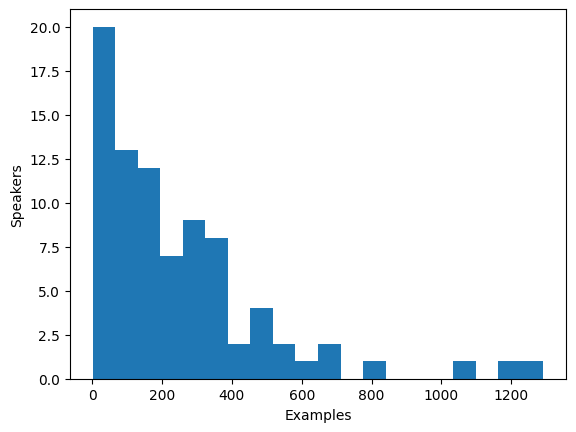

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

直方图显示，数据集中大约三分之一的说话者拥有的示例少于 100 个，而大约 10 个说话者拥有的示例超过 500 个。为了提高训练效率并平衡数据集，我们可以将数据限制在 100 到 400 个示例之间的说话者。

In [12]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id] <= 400


dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/20968 [00:00<?, ? examples/s]

让我们检查一下还剩下多少发言者：

In [13]:
len(set(dataset["speaker_id"]))

42

您只剩下来自大约 40 位独特演讲者的不到 10,000 个示例，这应该足够了。

请注意，如果示例很长，一些示例很少的发言者实际上可能有更多可用的音频。然而，确定每个说话者的音频总量需要扫描整个数据集，这是一个耗时的过程，涉及加载和解码每个音频文件。因此，我们选择在这里跳过这一步。

### Speaker embeddings

为了使 TTS 模型能够区分多个说话者，您需要为每个示例创建一个说话者嵌入。说话者嵌入是模型的附加输入，用于捕获特定说话者的语音特征。 要生成这些说话人嵌入，请使用SpeechBrain 中预先训练的spkrec-xvect-voxceleb模型。

创建一个函数create_speaker_embedding()，该函数接受输入音频波形并输出包含相应扬声器嵌入的 512 元素向量。

In [14]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

值得注意的是，该speechbrain/spkrec-xvect-voxceleb模型是根据 VoxCeleb 数据集的英语语音进行训练的，而本指南中的训练示例是荷兰语的。虽然我们相信这个模型仍然会为我们的荷兰数据集生成合理的说话人嵌入，但这个假设可能并不在所有情况下都成立。

为了获得最佳结果，我们需要首先在目标语音上训练 X 向量模型。这将确保模型能够更好地捕捉荷兰语中独特的语音特征。如果您想训练自己的 X 向量模型，可以使用此脚本 作为示例。

### 处理数据集

最后，让我们将数据处理成模型期望的格式。创建一个prepare_dataset函数，该函数接受单个示例并使用该SpeechT5Processor对象来标记输入文本并将目标音频加载到 log-mel 频谱图中。它还应该添加扬声器嵌入作为附加输入。

In [15]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

通过查看一个示例来验证处理是否正确：

In [16]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

说话人嵌​​入应该是一个 512 元素向量：

In [17]:
processed_example["speaker_embeddings"].shape

(512,)

标签应该是具有 80 个梅尔箱的对数梅尔谱图。

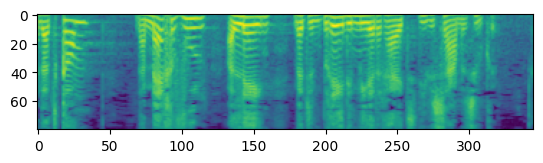

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

旁注：如果您发现此频谱图令人困惑，可能是因为您熟悉将低频置于图底部而高频置于图顶部的惯例。但是，当使用 matplotlib 库将频谱图绘制为图像时，y 轴会翻转，并且频谱图会上下颠倒。

现在我们需要将处理函数应用于整个数据集。这将需要 5 到 10 分钟。

In [19]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/9973 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (614 > 600). Running this sequence through the model will result in indexing errors


您将看到一条警告，指出数据集中的某些示例超过了模型可以处理的最大输入长度（600 个标记）。从数据集中删除这些示例。在这里，我们更进一步，为了允许更大的批量大小，我们删除了超过 200 个令牌的任何内容。

In [20]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200


dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/9973 [00:00<?, ? examples/s]

8259

接下来，创建基本的训练/测试拆分：

In [21]:
dataset = dataset.train_test_split(test_size=0.1)

### 数据整理者


为了将多个示例合并为一个批次，您需要定义一个自定义数据整理器。该整理器将使用填充标记填充较短的序列，确保所有示例具有相同的长度。对于频谱图标签，填充部分将替换为特殊值-100。此特殊值指示模型在计算频谱图损失时忽略频谱图的该部分。

In [22]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

在 SpeechT5 中，模型解码器部分的输入减少了 2 倍。换句话说，它从目标序列中每隔一个时间步就丢弃一次。然后解码器预测两倍长的序列。由于原始目标序列长度可能是奇数，因此数据整理器确保将批次的最大长度向下舍入为 2 的倍数。

In [23]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

### 训练模型

从与加载处理器相同的检查点加载预训练模型：

In [24]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

该use_cache=True选项与梯度检查点不兼容。禁用它进行训练，并重新启用缓存进行生成以加快推理时间：

In [25]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

定义训练参数。这里我们不会在训练过程中计算任何评估指标，我们将在本章稍后讨论评估。相反，我们只考虑损失：

In [26]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_nl",  # change to a repo name of your choice
    per_device_train_batch_size=2,
    gradient_accumulation_steps=16,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

实例化该Trainer对象并将模型、数据集和数据整理器传递给它。

In [27]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

这样，我们就可以开始训练了！训练将需要几个小时。根据您的 GPU，开始训练时您可能会遇到 CUDA“内存不足”错误。在这种情况下，您可以将per_device_train_batch_size增量减少 2 倍并增加gradient_accumulation_steps2 倍来进行补偿。

In [28]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.522900,0.478645
2000,0.499100,0.466051
3000,0.496400,0.462349
4000,0.489100,0.459250


TrainOutput(global_step=4000, training_loss=0.5232602052688599, metrics={'train_runtime': 24182.0748, 'train_samples_per_second': 5.293, 'train_steps_per_second': 0.165, 'total_flos': 1.4529741509539872e+16, 'train_loss': 0.5232602052688599, 'epoch': 17.22})

将最终模型推送到 🤗 Hub：

In [29]:
trainer.push_to_hub()

'https://huggingface.co/zongxiao/speecht5_finetuned_voxpopuli_nl/tree/main/'

### 推理

一旦你微调了模型，你就可以用它来进行推理！从 🤗 Hub 加载模型（确保在以下代码片段中使用您的帐户名）：

In [30]:
model = SpeechT5ForTextToSpeech.from_pretrained(
    "zongxiao/speecht5_finetuned_voxpopuli_nl"
)

选择一个示例，这里我们将从测试数据集中选取一个示例。获得扬声器嵌入。

In [31]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

定义一些输入文本并将其标记化。

In [32]:
text = "hallo allemaal, ik praat nederlands. groetjes aan iedereen!"

预处理输入文本：

In [33]:
inputs = processor(text=text, return_tensors="pt")

实例化声码器并生成语音：

In [34]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

准备好听听结果了吗？

In [35]:
from IPython.display import Audio

Audio(speech.numpy(), rate=16000)

在新语言上从该模型获得令人满意的结果可能具有挑战性。扬声器嵌入的质量可能是一个重要因素。由于 SpeechT5 是使用英语 x 向量进行预训练的，因此在使用英语说话者嵌入时表现最佳。如果合成语音听起来很差，请尝试使用不同的扬声器嵌入。

增加培训持续时间也可能提高结果的质量。即便如此，该语音显然是荷兰语而不是英语，并且它确实捕获了说话者的语音特征（与示例中的原始音频相比）。另一件需要试验的事情是模型的配置。例如，尝试使用config.reduction_factor = 1看看这是否会改善结果。

在下一节中，我们将讨论如何评估文本转语音模型。

## 评估文本转语音模型

在训练期间，文本转语音模型会针对预测的声谱图值与生成的声谱图值之间的均方误差损失（或平均绝对误差）进行优化。MSE 和 MAE 都鼓励模型最小化预测频谱图和目标频谱图之间的差异。然而，由于 TTS 是一个一对多映射问题，即给定文本的输出频谱图可以用多种不同的方式表示，因此对生成的文本到语音 (TTS) 模型的评估要困难得多。

与许多其他可以使用准确度或精确度等定量指标进行客观测量的计算任务不同，TTS 的评估在很大程度上依赖于主观的人类分析。

TTS 系统最常用的评估方法之一是使用平均意见分数 (MOS) 进行定性评估。MOS 是一种主观评分系统，允许人类评估者按照 1 到 5 的等级对合成语音的感知质量进行评分。这些分数通常是通过听力测试收集的，在听力测试中，人类参与者聆听合成语音样本并对其进行评分。

开发用于 TTS 评估的客观指标具有挑战性的主要原因之一是语音感知的主观性质。人类听众对语音的各个方面有不同的偏好和敏感性，包括发音、语调、自然度和清晰度。用单个数值捕捉这些感知上的细微差别是一项艰巨的任务。同时，人类评估的主观性使得对不同 TTS 系统进行比较和基准测试变得具有挑战性。

此外，这种评估可能会忽略语音合成的某些重要方面，例如自然性、表现力和情感影响。这些品质很难客观量化，但在合成语音需要传达类人品质并唤起适当情绪反应的应用中高度相关。

总之，由于缺乏真正客观的指标，评估文本到语音模型是一项复杂的任务。最常见的评估方法是平均意见得分 (MOS)，它依赖于主观的人类分析。虽然 MOS 为合成语音的质量提供了宝贵的见解，但它也引入了可变性和主观性。

## 动手练习

在本单元中，我们探索了文本转语音音频任务，讨论了现有数据集、预训练模型以及针对新语言微调 SpeechT5 的细微差别。

正如您所看到的，在资源匮乏的情况下，文本转语音任务的微调模型可能具有挑战性。与此同时，评估文本转语音模型也并不容易。

由于这些原因，本次实践练习将侧重于练习技能，而不是实现某个指标值。

此任务的目标是在您选择的数据集上微调 SpeechT5。您可以自由地从同一数据集中选择另一种语言voxpopuli，也可以选择本单元中列出的任何其他数据集。

请注意训练数据的大小！对于 Google Colab 的免费 G​​PU 上的训练，我们建议将训练数据限制在 10-15 小时左右。

完成微调过程后，将模型上传到 Hub 来共享您的模型。确保text-to-speech使用适当的 kwargs 或在 Hub UI 中将您的模型标记为模型。

请记住，本练习的主要目的是为您提供充足的练习，让您提高技能并更深入地了解文本到语音的音频任务。

## 补充阅读和资源

本单元介绍了文本转语音任务，并涵盖了很多基础知识。想了解更多吗？在这里您将找到更多资源，帮助您加深对主题的理解并增强您的学习体验。

    HiFi-GAN: Generative Adversarial Networks for Efficient and High Fidelity Speech Synthesis：介绍用于语音合成的 HiFi-GAN 的论文。
    X-Vectors: Robust DNN Embeddings For Speaker Recognition：一篇介绍用于说话人嵌入的 X-Vector 方法的论文。
    FastSpeech 2: Fast and High-Quality End-to-End Text to Speech：一篇介绍 FastSpeech 2 的论文，这是另一种使用非自回归 TTS 方法的流行文本到语音模型。
    A Vector Quantized Approach for Text to Speech Synthesis on Real World Spontaneous Speech：一篇介绍 MQTTS 的论文，MQTTS 是一种自回归 TTS 系统，用量化离散表示取代梅尔频谱图。